In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
drinks = pd.read_csv('drinks.csv')
countries = pd.read_csv('Countries of the world.csv')
countries.rename(str.lower, axis = 'columns', inplace = True)
countries['country'] = countries['country'].map(lambda x: x.strip())
countries['region'] = countries['region'].map(lambda x: x.strip())
frames = (drinks, countries)
merged_data = pd.merge(drinks, countries, on = 'country')
subdata = merged_data[['region', 'beer_servings', 'spirit_servings',\
                       'wine_servings', 'total_litres_of_pure_alcohol']]
data = subdata.groupby('region').sum()

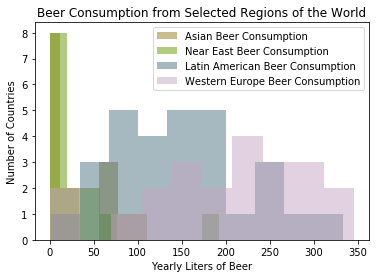

In [3]:
a_beer = merged_data.loc[(merged_data['region']=='ASIA (EX. NEAR EAST)'),\
                            'beer_servings']
ne_beer = merged_data.loc[(merged_data['region']=='NEAR EAST'),\
                            'beer_servings']
la_beer = merged_data.loc[(merged_data['region']=='LATIN AMER. & CARIB'),\
                            'beer_servings']
we_beer = merged_data.loc[(merged_data['region']=='WESTERN EUROPE'),\
                            'beer_servings']

plt.hist(a_beer, color='#967b1b', alpha=0.5, label\
         ='Asian Beer Consumption')
plt.hist(ne_beer, color='#669909', alpha=0.5, label\
         ='Near East Beer Consumption')
plt.hist(la_beer, color='#4e7382', alpha=0.5, label\
         ='Latin American Beer Consumption')
plt.hist(we_beer, color='#c6a5c2', alpha=0.5, label\
         ='Western Europe Beer Consumption')
plt.title('Beer Consumption from Selected Regions of the World')
plt.xlabel('Yearly Liters of Beer')
plt.ylabel('Number of Countries')
plt.legend()
plt.show()

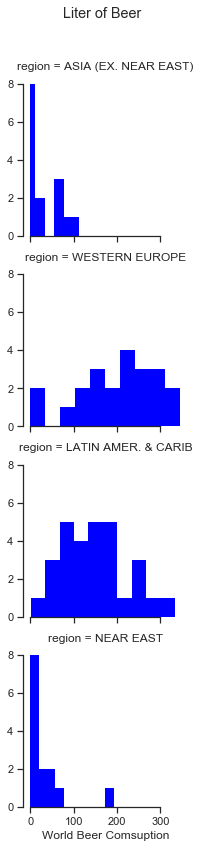

In [4]:
sub_merged = merged_data[['country', 'region', 'beer_servings']]\
    .loc[(merged_data['region']=='ASIA (EX. NEAR EAST)') |\
         (merged_data['region']=='WESTERN EUROPE') |\
         (merged_data['region']=='NEAR EAST') |\
         (merged_data['region']=='LATIN AMER. & CARIB')]
             
sns.set(style='ticks')

g = sns.FacetGrid(sub_merged, row='region')
g.map(plt.hist, 'beer_servings', color='blue',  lw=0)

plt.subplots_adjust(top=0.9)

g.set_axis_labels('World Beer Comsuption')
plt.suptitle('Liter of Beer')
sns.despine(trim=True)
plt.show()

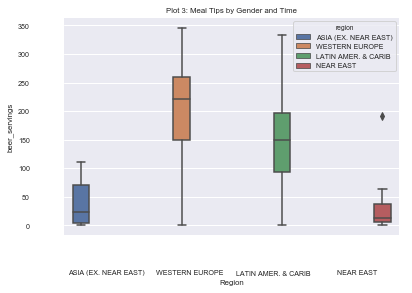

In [13]:
sns.set(font_scale=0.65)
ax = sns.boxplot(x='region',y='beer_servings',hue='region',data=sub_merged)  
plt.title('Plot 3: Meal Tips by Gender and Time')
sns.despine(offset=25, trim=True)
ax.set(xlabel='Region', ylabel='beer_servings')

plt.show()

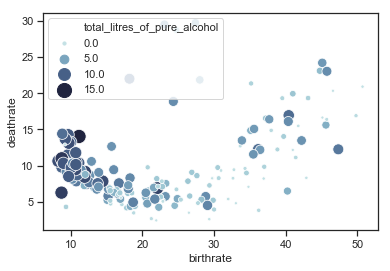

In [6]:
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
ax = sns.scatterplot(x='birthrate', y='deathrate',
                     hue='total_litres_of_pure_alcohol', 
                     size='total_litres_of_pure_alcohol',
                     palette=cmap, sizes=(10, 200),
                     data=merged_data)